In [1]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import matplotlib
import warnings
warnings.filterwarnings('ignore')  

In [2]:
import numpy as np

pi = np.pi

def myQFT(nqubits):

    myQFT_circuit = QuantumCircuit(nqubits)

    for qubit in range(nqubits):            # Looping over all the qubits
        myQFT_circuit.h(qubit)                          # Applying the Hadamard gate
        for otherqubit in range(qubit+1, nqubits):
            myQFT_circuit.cp(pi/2**(otherqubit-qubit), otherqubit, qubit)       # Applying the controlled-phase gate i.e applying a series of rotations 
    return myQFT_circuit

display(myQFT(4).draw())
display(QFT(4).draw())

┌───┐                                                                     
q_0: ┤ H ├─■────────■─────────────■────────────────────────────────────────────
     └───┘ │P(π/2)  │       ┌───┐ │                                            
q_1: ──────■────────┼───────┤ H ├─┼────────■────────■──────────────────────────
                    │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐              
q_2: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■────────────
                                  │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐
q_3: ─────────────────────────────■─────────────────■─────────────■───────┤ H ├
                                                                          └───┘

┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1     ├
     │  QFT │
q_2: ┤2     ├
     │      │
q_3: ┤3     ├
     └──────┘

Computational basis


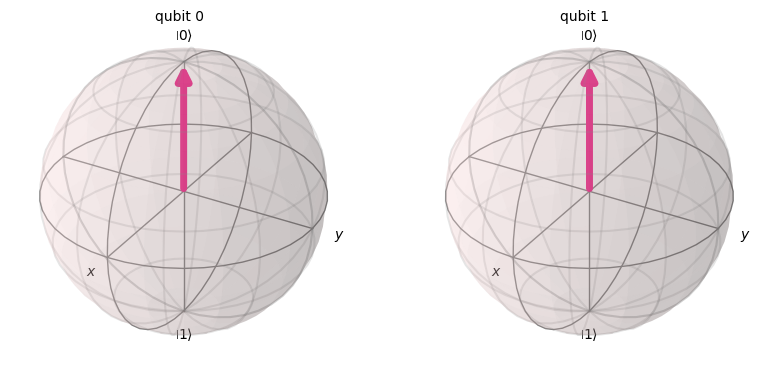

Fourier basis


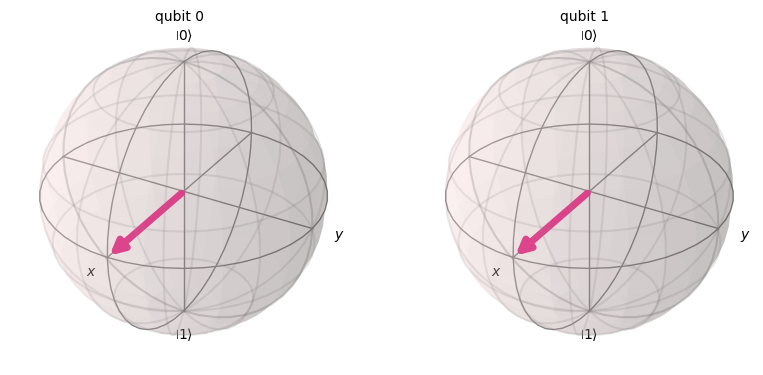

In [4]:
state = '00'

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])
print("Computational basis")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
print("Fourier basis")
mycircuit.append(myQFT(len(state)), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

000 0
Fourier basis


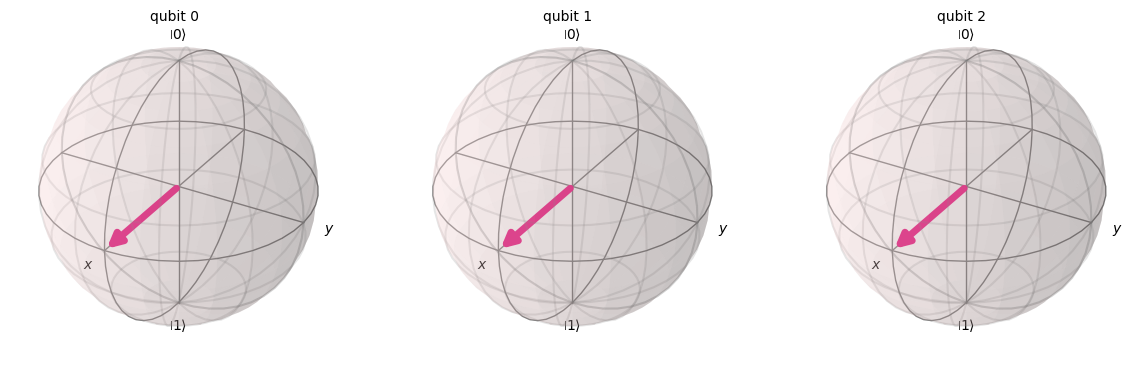

001 1
Fourier basis


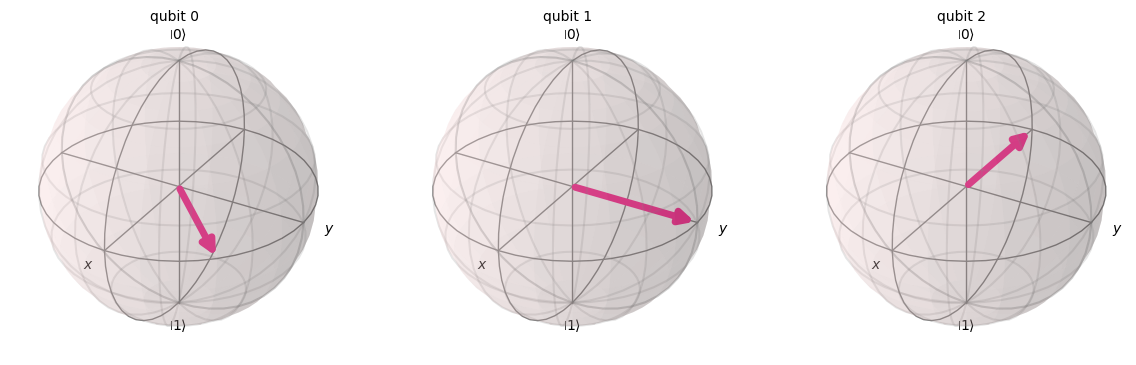

010 2
Fourier basis


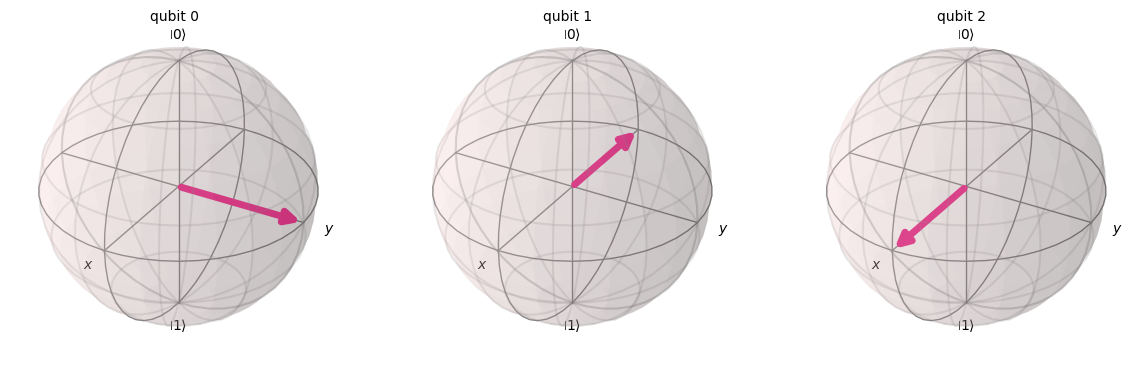

011 3
Fourier basis


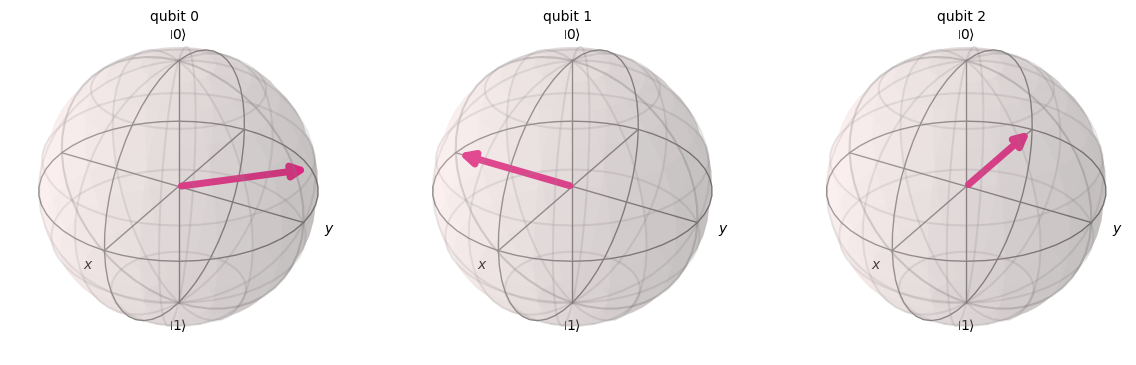

100 4
Fourier basis


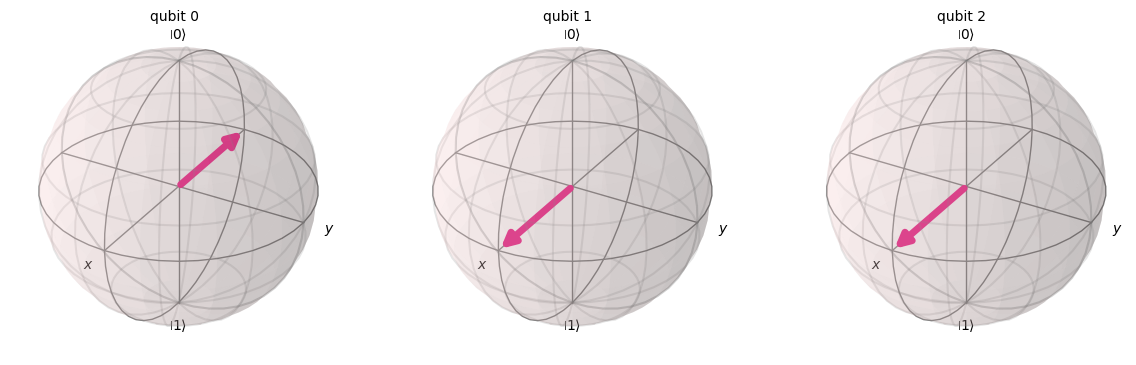

101 5
Fourier basis


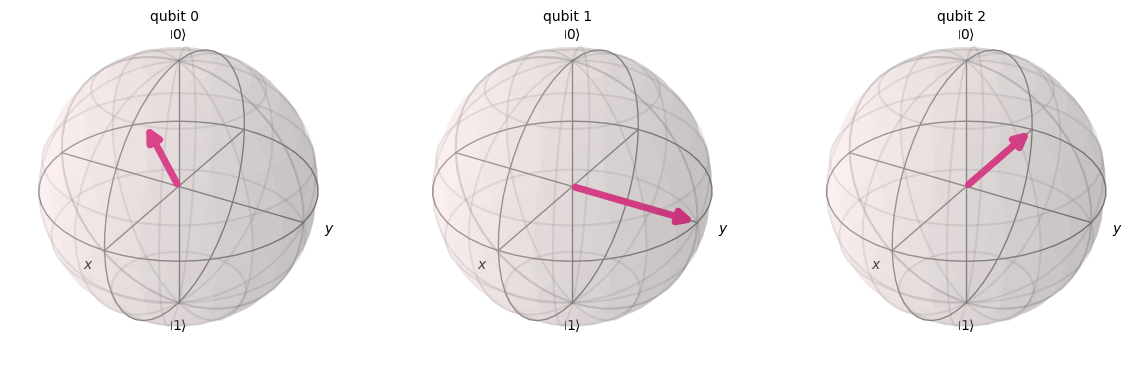

110 6
Fourier basis


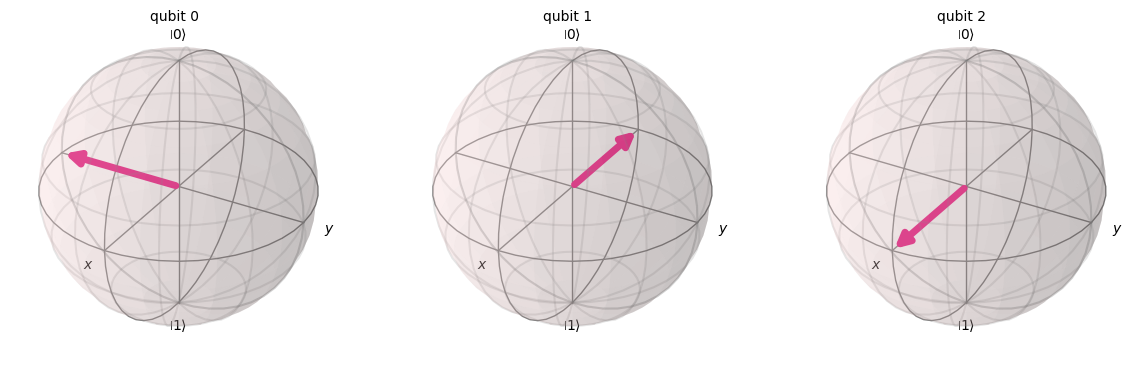

111 7
Fourier basis


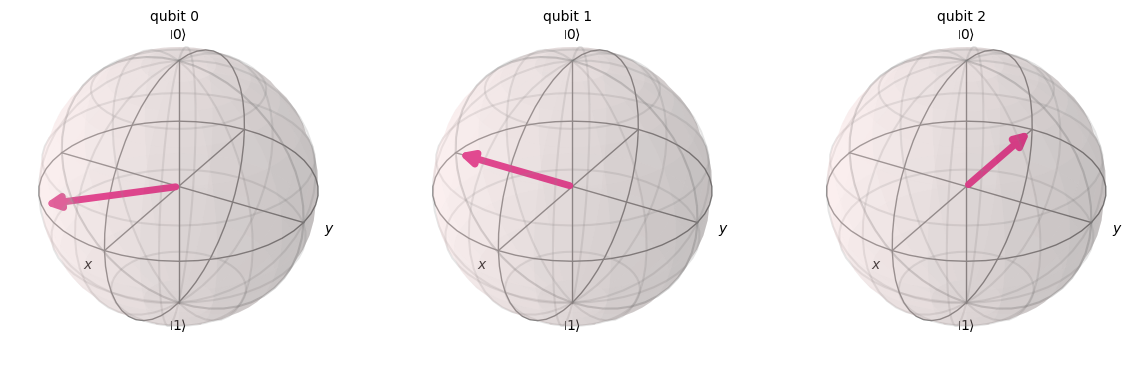

000 8
Fourier basis


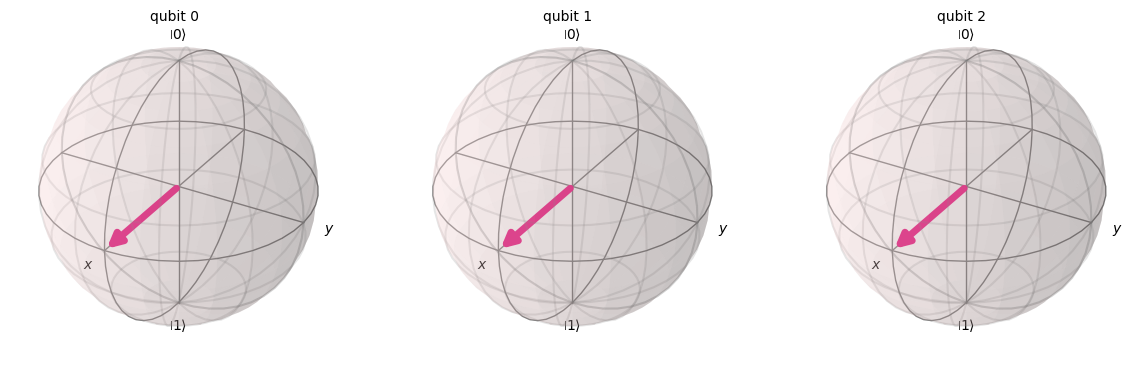

In [7]:
n_qubits = 3

states = [format(x, f'0{n_qubits}b') for x in range(2**n_qubits)]
states.append(states[0])

for ii, state in enumerate(states) : 
    # mycircuit = QuantumCircuit(len(states))
    mycircuit = QuantumCircuit(n_qubits)
    mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])
    print('==============================')
    print(state, ii)

    # print('Computational basis')
    # display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

    print("Fourier basis")
    mycircuit.append(myQFT(len(state)), mycircuit.qubits)
    display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))
    print('==============================')